In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
fruit_data = pd.read_table("/content/drive/MyDrive/Colab Notebooks/Projects/Fruit Classifier/Fruit Classifier using KNN/fruit_data_with_colors.txt")
fruit_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [ ]:
fruit_data.fruit_label.unique()

array([1, 2, 3, 4])

In [ ]:
fruit_data.drop(['fruit_name', 'fruit_subtype'], axis=1, inplace=True)
fruit_data.head()

,fruit_label,mass,width,height,color_score
0,1,192,8.4,7.3,0.55
1,1,180,8.0,6.8,0.59
2,1,176,7.4,7.2,0.60
3,2,86,6.2,4.7,0.80
4,2,84,6.0,4.6,0.79


In [ ]:
X = fruit_data.copy()
y = X.pop('fruit_label')
X.head()

,mass,width,height,color_score
0,192,8.4,7.3,0.55
1,180,8.0,6.8,0.59
2,176,7.4,7.2,0.60
3,86,6.2,4.7,0.80
4,84,6.0,4.6,0.79


In [ ]:
y.head()

0    1
1    1
2    1
3    2
4    2
Name: fruit_label, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X))
X_scaled.columns = X.columns
X_scaled.head()

,mass,width,height,color_score
0,0.405594,0.684211,0.507692,0.000000
1,0.363636,0.578947,0.430769,0.105263
2,0.349650,0.421053,0.492308,0.131579
3,0.034965,0.105263,0.107692,0.657895
4,0.027972,0.052632,0.092308,0.631579


In [ ]:
X_train.shape

(44, 4)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=1)

In [ ]:
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=4),
    layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

train_score = model.evaluate(X_train, y_train)
valid_score = model.evaluate(X_valid, y_valid)

TypeError: ignored

In [ ]:
y_train_pred = model.predict(X_train).flatten()
y_valid_pred = model.predict(X_valid).flatten()

1/1 [==============================] - 0s 83ms/step


<Axes: xlabel='height', ylabel='width'>

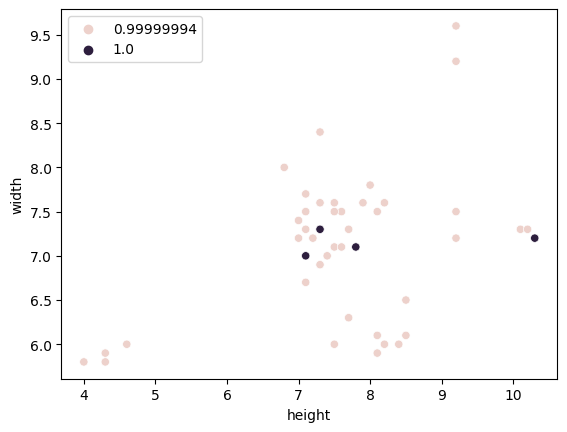

In [ ]:
sns.scatterplot(x=X_train.height, y=X_train.width, hue=y_train_pred)